In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# --- Parameters ---
λ = 1.0   # arrival rate (customers per minute)
μ = 1.2   # service rate (customers per minute)
SIM_TIME = 4 * 60  # 4 hours in minutes

In [21]:
# --- Initialization ---
np.random.seed(42) # sets the random number generator to a fixed starting state every run produces the same random numbers

arrival_time=np.random.exponential(1/λ)
service_time=np.random.exponential(1/μ)
time = 0
queue = []
server_busy = False
wait_times = []
departures = []
arrivals = []


In [22]:
# --- Event-driven simulation ---

while time < SIM_TIME:

    if not server_busy:
        # Generating new arrival
        arrival_time=np.random.exponential(1/λ)
        arrivals.append(arrival_time)
        server_busy=True

        service_time=np.random.exponential(1/μ)
        departure_time=service_time + arrival_time
        departures.append(departure_time)

        wait_times.append(0)

    else:
        # either new arrival or departure
        next_arrival=np.random.exponential(1/λ)

        if next_arrival < departure_time:
            # Customer join the queue
            queue.append(next_arrival)

        else:
            # Departure
            time+=service_time
            server_busy=False

            if queue:
                service_time=np.random.exponential(1/μ)
                time+=service_time
                wait_times.append(time - wait_times.pop(0)) 




In [23]:
# --- Results ---
avg_wait = np.mean(wait_times)
utilization = λ / μ
print(f"Average waiting time: {avg_wait:.2f} min")
print(f"Server utilization: {utilization:.2f}")

Average waiting time: 71.29 min
Server utilization: 0.83


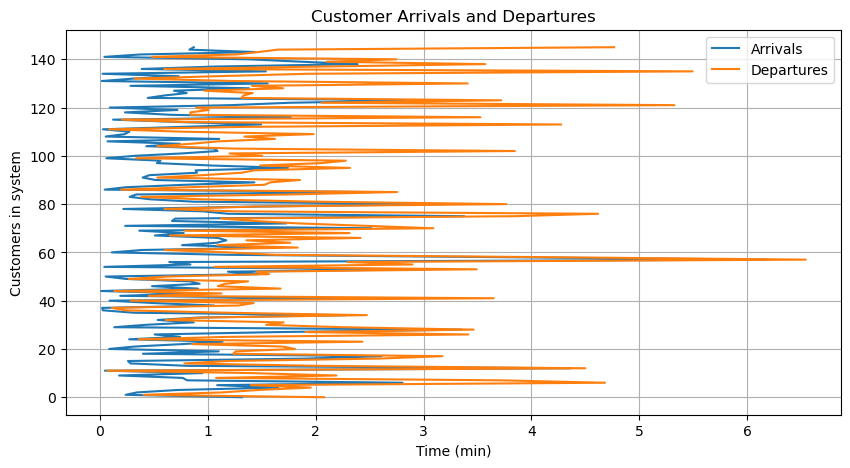

In [24]:
# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(arrivals, range(len(arrivals)), label="Arrivals")
plt.plot(departures, range(len(departures)), label="Departures")
plt.xlabel("Time (min)")
plt.ylabel("Customers in system")
plt.title("Customer Arrivals and Departures")
plt.legend()
plt.grid(True)
plt.show()